In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
#non-nullだったらNAなし
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
Age         850 non-null int64
Gender      850 non-null object
T_Bil       850 non-null float64
D_Bil       850 non-null float64
ALP         850 non-null float64
ALT_GPT     850 non-null float64
AST_GOT     850 non-null float64
TP          850 non-null float64
Alb         850 non-null float64
AG_ratio    850 non-null float64
disease     850 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 73.1+ KB


In [5]:
df.isnull().sum()

Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include="all")

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,850.000000,850,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,46.610588,NaN,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706
std,16.453672,NaN,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226
min,10.000000,NaN,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000
25%,32.000000,NaN,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000
50%,48.000000,NaN,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000
75%,62.000000,NaN,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000


In [8]:
col_categoric = ["Gender","disease"]
df_numeric = df.drop(col_categoric,axis=1)
df_categoric = df[col_categoric]

In [14]:
print(df_categoric["Gender"].value_counts())
print(df_categoric["disease"].value_counts())

Male      702
Female    148
Name: Gender, dtype: int64
0    472
1    378
Name: disease, dtype: int64


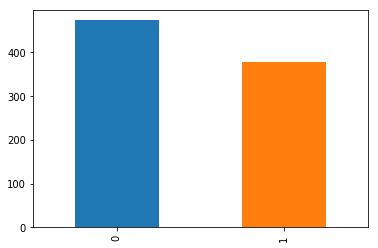

In [15]:
df_categoric["disease"].value_counts().plot(kind="bar")
plt.show()

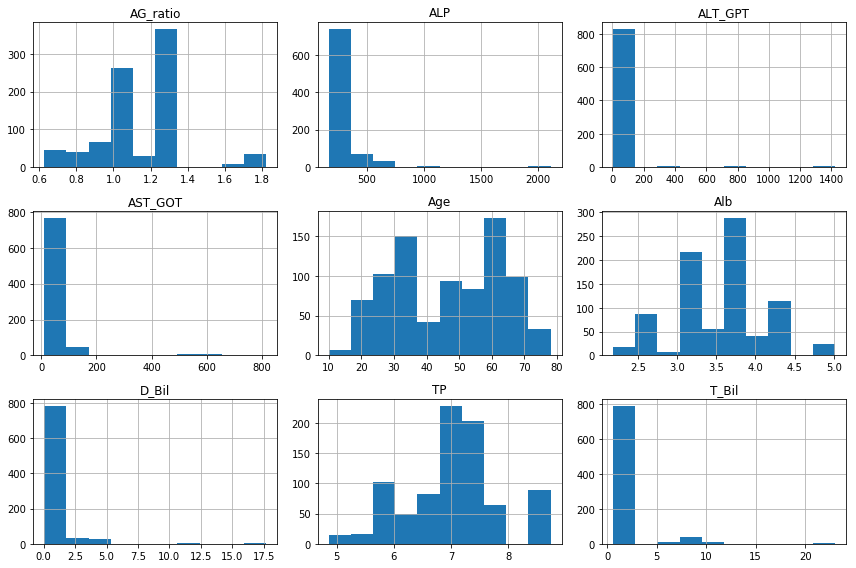

In [18]:
#figsize=(横の大きさ, 縦の大きさ)
df_numeric.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

In [19]:
df_tmp = pd.concat([df_categoric["disease"],df_numeric],axis=1)

In [25]:
df_tmp.query("disease == 0").head()

,disease,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802
2,0,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952
4,0,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654
7,0,61,0.785634,0.163831,217.508493,13.246081,23.332810,6.806820,3.648084,1.296773
10,0,39,0.728903,0.134428,358.069584,13.159803,25.933828,5.709329,2.605893,1.017509


In [24]:
df_tmp[df_tmp["disease"]==1].head()

,disease,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
1,1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346
3,1,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155
5,1,44,0.778259,0.078457,211.647469,19.173386,97.312206,8.716854,4.150685,1.034406
6,1,65,0.930377,0.256073,645.605278,53.110989,71.226025,8.610077,3.468565,1.236994
8,1,65,8.937923,4.076624,225.461271,21.857357,58.842232,6.823779,3.171400,0.992523


C:\Users\masato\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


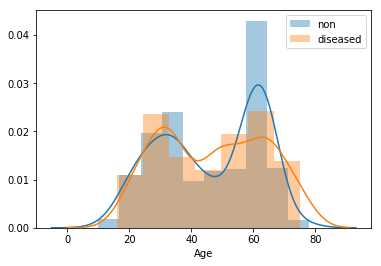

In [32]:
sns.distplot(df_tmp.query("disease == 0")["Age"])
sns.distplot(df_tmp.query("disease == 1")["Age"])

plt.legend(labels=["non","diseased"],loc="upper right")
plt.show()

C:\Users\masato\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


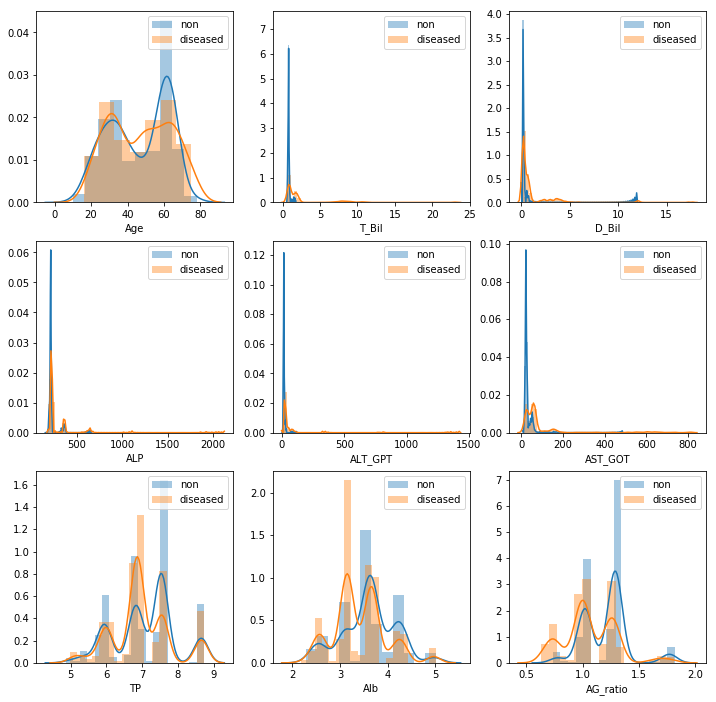

In [34]:
plt.figure(figsize=(12,12))

for ncol,colname in enumerate(df_numeric.columns,1):
    plt.subplot(3,3,ncol)
    sns.distplot(df_tmp.query("disease == 0")[colname])
    sns.distplot(df_tmp.query("disease == 1")[colname])
    plt.legend(labels=["non","diseased"],loc="upper right")
    
plt.show()

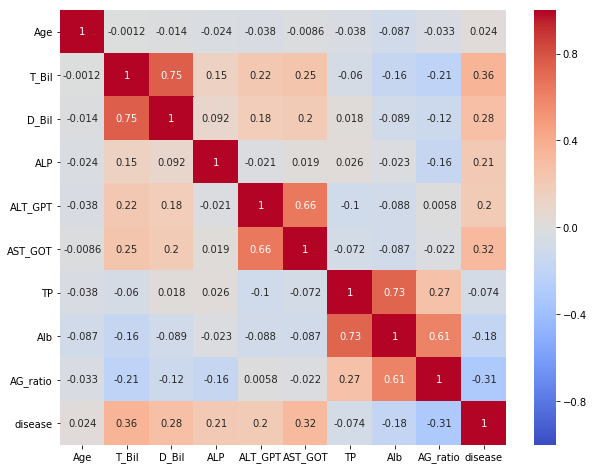

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin=-1.0,vmax=1.0,annot=True,cmap="coolwarm")
plt.show()